(pratica_isostasia)=
# Pr√°tica 2: Isostasia, flexura e gravidade

```{admonition} Objetivos
:class: important

1. bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla
1. bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla
1. bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla
1. bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla
```

```{admonition} Antes de come√ßar
:class: seealso

Esta pr√°tica depende do conte√∫do das aulas:

* {ref}`litosfera`
* {ref}`gravidade`
* {ref}`isostasia`
* {ref}`pratica_grav`
```

## Bibliotecas

Vamos primeiro carregar as bibliotecas que vamos utilizar nessa pr√°tica.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import xrft
import harmonica as hm
import verde as vd
import pyproj
import pygmt

## Dados

Nesta pr√°tica, vamos utilizar os dados de dist√∫rbio da gravidade, anomalia Bouguer simples e topografia que compilamos na pr√°tica passada.

In [2]:
dados = xr.load_dataset("dados.nc")
dados

<xarray.Dataset>
Dimensions:     (longitude: 2161, latitude: 1081)
Coordinates:
  * longitude   (longitude) float64 -180.0 -179.8 -179.7 ... 179.7 179.8 180.0
  * latitude    (latitude) float64 -90.0 -89.83 -89.67 ... 89.67 89.83 90.0
    height      (latitude, longitude) float32 1e+04 1e+04 1e+04 ... 1e+04 1e+04
Data variables:
    gravidade   (latitude, longitude) float32 9.801e+05 9.801e+05 ... 9.802e+05
    disturbio   (latitude, longitude) float64 -35.84 -35.84 ... 15.16 15.16
    topografia  (latitude, longitude) float32 2.742e+03 2.742e+03 ... -4.237e+03
    bouguer     (latitude, longitude) float64 -339.5 -339.5 ... 303.7 303.7

## Bouguer vs topografia

Como vimos na aula te√≥rica, nos casos em que h√° compensa√ß√£o isost√°tica segundo o modelo de Airy esperamos que a anomalia Bouguer possua uma **rela√ß√£o linear** com a topografia. Vamos verificar se isso √© verdade para a Terra como um todo utilizando nossos dados.

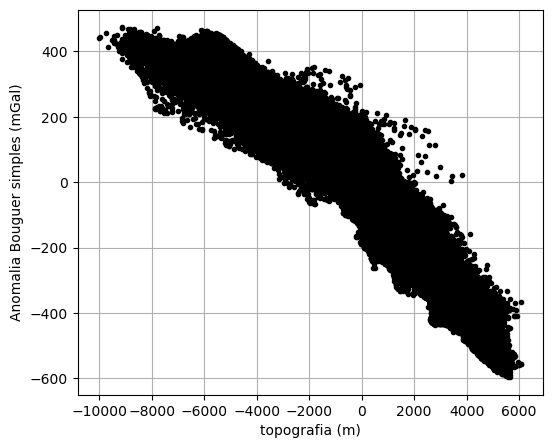

In [3]:
plt.figure(figsize=(6, 5))
plt.plot(dados.topografia.values.ravel(), dados.bouguer.values.ravel(), ".k")
plt.xlabel("topografia (m)")
plt.ylabel("Anomalia Bouguer simples (mGal)")
plt.grid()

A princ√≠pio parece que sim! Vamos calcular o valor te√≥rico predito para ser se nosso modelo se ajusta aos dados.

In [4]:
def bouguer_airy(topografia, densidade_crosta_continental, densidade_crosta_oceanica, densidade_agua):
    """
    Calcula a anomalia Bouguer prevista por um modelo de Airy.
    """
    G = 6.67430e-11
    bouguer = xr.where(
        topografia >= 0,
        1e5 * -2 * np.pi * G * densidade_crosta_continental * topografia,
        1e5 * -2 * np.pi * G * (densidade_crosta_oceanica - densidade_agua) * topografia,
    )
    return bouguer

In [5]:
previsto = bouguer_airy(
    dados.topografia, 
    densidade_crosta_continental=2700, 
    densidade_crosta_oceanica=2800, 
    densidade_agua=1000,
)

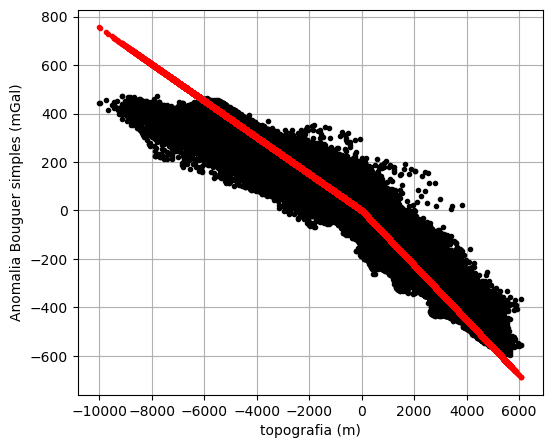

In [6]:
plt.figure(figsize=(6, 5))
plt.plot(dados.topografia.values.ravel(), dados.bouguer.values.ravel(), ".k")
plt.plot(dados.topografia.values.ravel(), previsto.values.ravel(), ".r")
plt.xlabel("topografia (m)")
plt.ylabel("Anomalia Bouguer simples (mGal)")
plt.grid()

:::{admonition} üí¨ **Discuss√£o**
:class: tip

Com base na figura acima üëÜüèΩ, discuta em grupos de 2-3:

1. Quais ambientes tect√¥nicos s√£o respons√°veis pelo desajuste no canto superior esquerdo e inferior direito da figura? 
1. Qual √© uma poss√≠vel explica√ß√£o geof√≠sica/tect√¥nica para esse desajuste?

:::

::::{admonition} üßò **Sua vez: O que acontece nas dorsais?** 
:class: tip

As dorsais est√£o em equil√≠brio isost√°tico, como vimos no mapa do dist√∫rbio da gravidade na aula passada. Por√©m, o modelo Airy n√£o √© adequado para explicar a compensa√ß√£o isost√°tica das dorsais.

1. Qual modelo de compensa√ß√£o explica o equil√≠brio nas dorsais?
1. Derive a rela√ß√£o entre topografia e anomalia Bouguer para esse modelo e a implemente em uma fun√ß√£o.
1. Selecione uma parcela dos dados que cont√©m uma dorsal e aplique seu modelo.
1. O modelo ajusta os dados? Como esse modelo difere da previs√£o utilizando Airy?

::::

## Flexura da litosfera oce√¢nica

In [7]:
havai = dados.sel(longitude=slice(-180, -150), latitude=slice(15, 30))

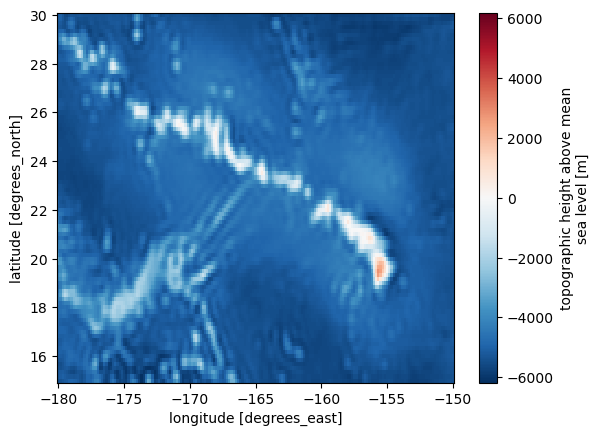

In [8]:
havai.topografia.plot()

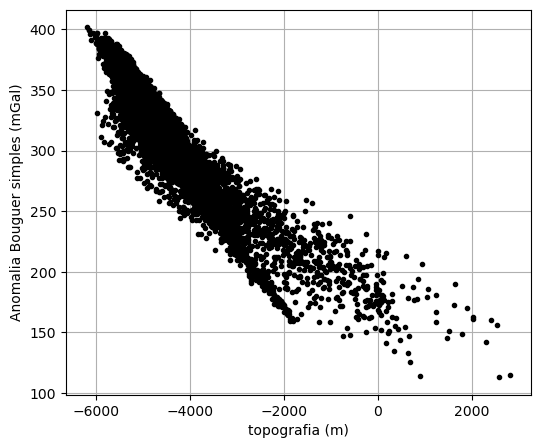

In [9]:
plt.figure(figsize=(6, 5))
plt.plot(havai.topografia.values.ravel(), havai.bouguer.values.ravel(), ".k")
plt.xlabel("topografia (m)")
plt.ylabel("Anomalia Bouguer simples (mGal)")
plt.grid()

In [10]:
merc = pyproj.Proj(proj="merc")
topografia = vd.project_grid(havai.topografia, merc, method="nearest")
disturbio = vd.project_grid(havai.disturbio, merc, method="nearest")

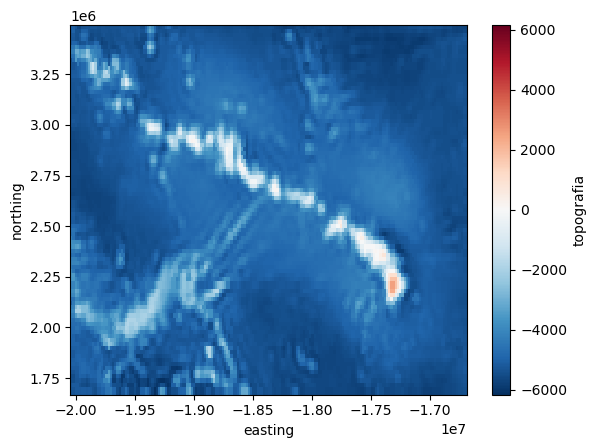

In [11]:
topografia.plot()

$$
W(k_x, k_y) = \dfrac{-(\rho_c - \rho_w)}{(\rho_m - \rho_c)}\left[1 + \dfrac{D(2\pi k)^4}{g(\rho_m - \rho_c)}\right]^{-1} T(k_x, k_y)
$$

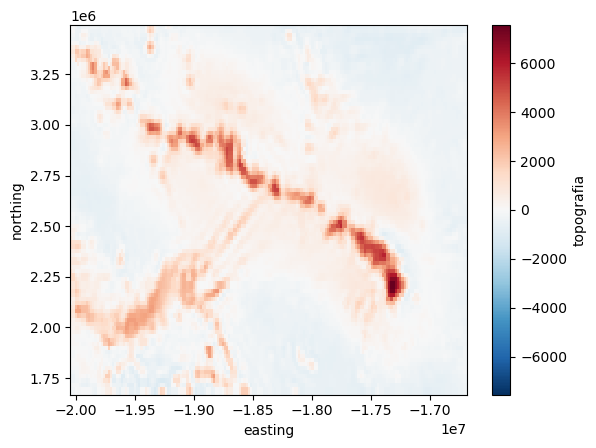

In [12]:
s = np.median(topografia)
topografia_residual = topografia - s
topografia_residual.plot()

/home/leo/bin/conda/envs/aula2023/lib/python3.10/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)


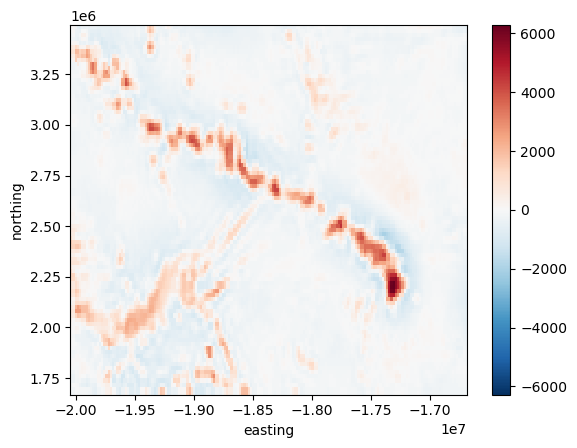

In [13]:
topografia_residual = hm.gaussian_highpass(topografia_residual, wavelength=1e6)
topografia_residual.plot()

In [14]:
topografia_ft = xrft.fft(topografia_residual, true_amplitude=True, true_phase=True)

In [17]:
def filtro_flexura(
    kx, ky, Te, densidade_crosta=2800, densidade_agua=1000, densidade_manto=3300, 
    young=6.5e10, poisson=0.25, gravidade=9.8,
):
    """
    Calcula o filtro da flexura no dom√≠nio da frequ√™ncia.
    """
    D = young * Te ** 3 / (
        12 * (1 - poisson ** 2)
    )
    k = np.sqrt(ky**2 + kx**2)
    filtro = (
        -(densidade_crosta - densidade_agua) 
        / (densidade_manto - densidade_crosta) 
        * 1 / (
            1 + (D * (2 * np.pi * k)**4)
            / (gravidade * (densidade_manto - densidade_crosta))
        )
    )
    return filtro

/home/leo/bin/conda/envs/aula2023/lib/python3.10/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)


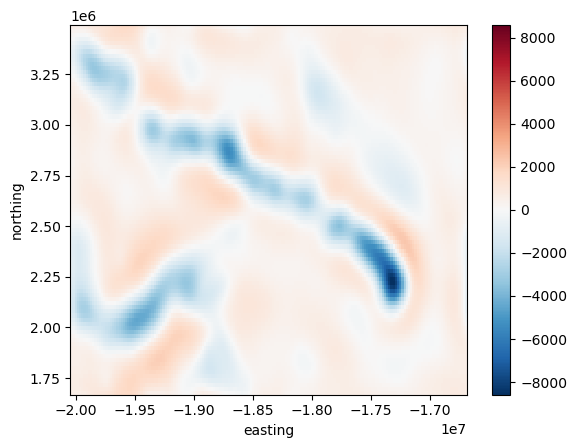

In [18]:
flexura = xrft.ifft(
    filtro_flexura(
        topografia_ft.freq_easting, 
        topografia_ft.freq_northing, 
        Te=20e3,
    ) * topografia_ft, 
    true_amplitude=True, 
    true_phase=True,
).real
flexura.plot()

In [19]:
disturbio_ft = xrft.fft(hm.gaussian_highpass(disturbio * 1e-5, wavelength=1e6), true_amplitude=True, true_phase=True)
disturbio_ft = xrft.fft(disturbio * 1e-5, true_amplitude=True, true_phase=True)

/home/leo/bin/conda/envs/aula2023/lib/python3.10/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)


In [20]:
filtro_grav_topo = disturbio_ft / topografia_ft
k = np.sqrt(topografia_ft.freq_northing**2 + topografia_ft.freq_easting**2)

Text(0, 0.5, 'N√∫mero de onda (1/m)')

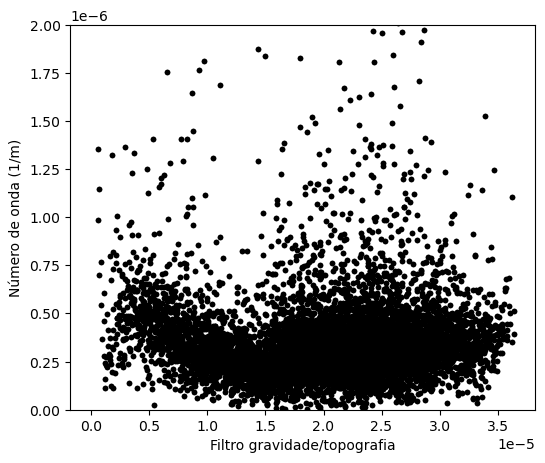

In [21]:
plt.figure(figsize=(6, 5))
plt.plot(k.values.ravel(), np.abs(filtro_grav_topo).values.ravel(), ".k")
plt.ylim(0, 0.000002)
plt.xlabel("Filtro gravidade/topografia")
plt.ylabel("N√∫mero de onda (1/m)")

In [22]:
def filtro_flexura_grav(
    kx, ky, Te, distancia, espessura_crosta,
    densidade_crosta=2800, densidade_agua=1000, densidade_manto=3300, 
    young=6.5e10, poisson=0.25, gravidade=9.8,
):
    """
    Calcula o filtro para prever grav causado pela flexura.
    """
    G = 6.67430e-11
    D = young * Te ** 3 / (
        12 * (1 - poisson ** 2)
    )
    k = np.sqrt(ky**2 + kx**2)
    filtro = (
        2 * np.pi * G * (densidade_crosta - densidade_agua)
        * np.exp(-2 * np.pi * k * distancia) * (
            1 - 1 / (
                1 + (D * (2 * np.pi * k)**4)
                / (gravidade * (densidade_manto - densidade_crosta))
            ) * np.exp(-2 * np.pi * k * espessura_crosta)
        )
    )
    return filtro

In [23]:
filtro_grav_topo_pred = filtro_flexura_grav(    
    topografia_ft.freq_easting, 
    topografia_ft.freq_northing, 
    Te=30e3,
    distancia=10e3 - s,
    espessura_crosta=6e3,
)

Text(0, 0.5, 'N√∫mero de onda (1/m)')

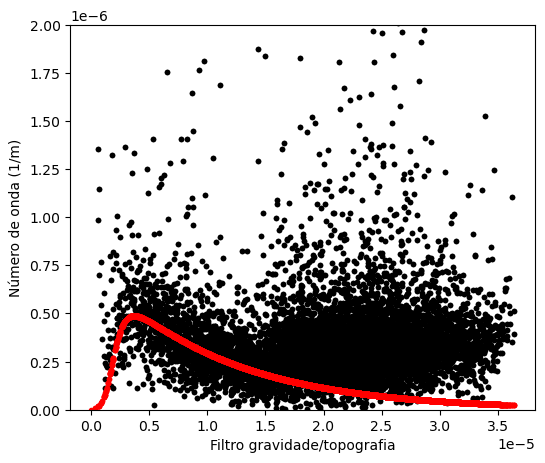

In [24]:
plt.figure(figsize=(6, 5))
plt.plot(k.values.ravel(), np.abs(filtro_grav_topo).values.ravel(), ".k")
plt.plot(k.values.ravel(), np.abs(filtro_grav_topo_pred).values.ravel(), ".r")
plt.ylim(0, 0.000002)
plt.xlabel("Filtro gravidade/topografia")
plt.ylabel("N√∫mero de onda (1/m)")